In [1]:
# download on https://bcsiriuschen.github.io/CARC/

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

from PIL import Image
from IPython.display import display, HTML
from pathlib import Path

In [6]:
def read_dataset(dataset_dir):
    current_path = Path('.')
    dataset_path = Path(dataset_dir)
    dataset = []
    for file in dataset_path.glob('**/*'):
        if file.suffix != '.jpg':
            print(f'File with extension different than .jpg. File extension found: {file.suffix}')
        else:
            filename = file.stem
            attributes = filename.split('_')
            data = {
                'person_name': '_'.join(attributes[1:-1]),
                'picture_per_person_id': int(attributes[-1]),
                'age': int(attributes[0]),
                'filepath': str(file.relative_to(current_path))
            }
            dataset.append(data)
    return dataset

In [7]:
dataset_data = read_dataset('../datasets/cacd/CACD2000')

In [8]:
df = pd.DataFrame(dataset_data)

df.head()

,person_name,picture_per_person_id,age,filepath
0,Elisabeth_Shue,8,48,../datasets/cacd/CACD2000/48_Elisabeth_Shue_00...
1,Christine_Baranski,3,52,../datasets/cacd/CACD2000/52_Christine_Baransk...
2,Daniel_Brühl,5,32,../datasets/cacd/CACD2000/32_Daniel_Brühl_0005...
3,Melissa_McBride,17,47,../datasets/cacd/CACD2000/47_Melissa_McBride_0...
4,Robbie_Amell,3,21,../datasets/cacd/CACD2000/21_Robbie_Amell_0003...


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89633 entries, 0 to 89632
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   person_name            89633 non-null  object
 1   picture_per_person_id  89633 non-null  int64 
 2   age                    89633 non-null  int64 
 3   filepath               89633 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.7+ MB


<AxesSubplot:>

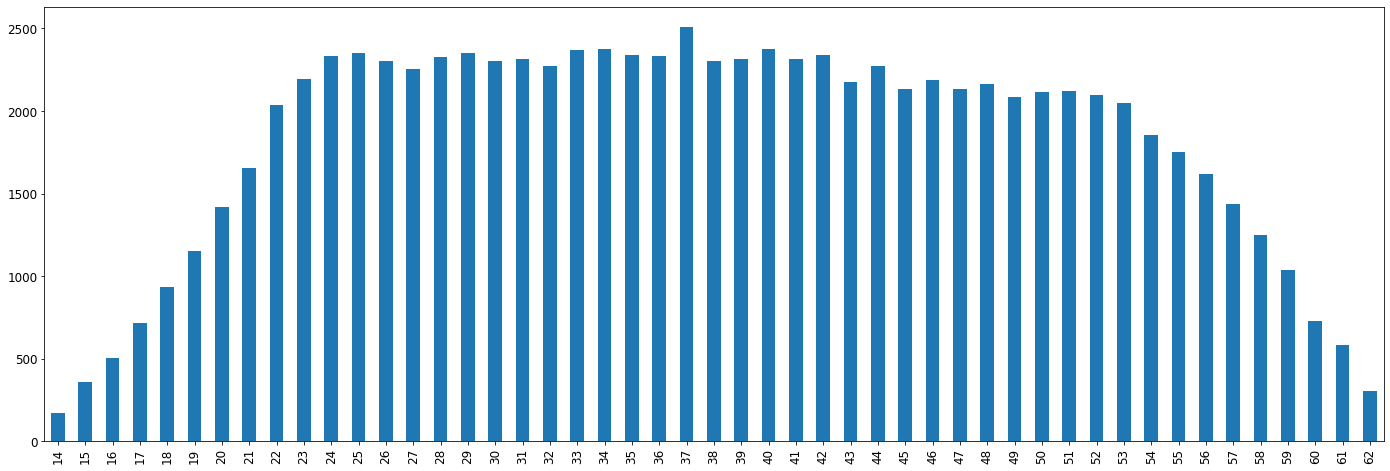

In [9]:
df['age'].value_counts().sort_index().plot(kind='bar', fontsize=12, figsize=(24,8))

In [10]:
total_cnt, minor_cnt = 0, 0

for age, count in df['age'].value_counts().items():
    if age < 18:
        minor_cnt += count
    total_cnt += count
    
minor_p = minor_cnt/total_cnt

In [11]:
print(f'Percentile of minors: \t {minor_p * 100 : .2f}%')

Percentile of minors: 	  1.96%


In [12]:
samples = df.sample(n=18)
samples.head()

,person_name,picture_per_person_id,age,filepath
54494,James_Van_Der_Beek,8,28,../datasets/cacd/CACD2000/28_James_Van_Der_Bee...
36541,Steve_Guttenberg,1,52,../datasets/cacd/CACD2000/52_Steve_Guttenberg_...
16356,Paula_Patton,12,31,../datasets/cacd/CACD2000/31_Paula_Patton_0012...
42086,Michael_Trevino,2,28,../datasets/cacd/CACD2000/28_Michael_Trevino_0...
30910,Kat_Graham,10,23,../datasets/cacd/CACD2000/23_Kat_Graham_0010.jpg


In [13]:
def display_image_grid(df, n_rows, n_cols):
    """
    Displays a grid of images in a Jupyter Notebook using ImageGrid.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing image paths.
    n_cols (int): Number of columns in the grid.
    """
    fig = plt.figure(figsize=(n_cols * 3, n_rows * 3))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(n_rows, n_cols),  # create grid of axes
                     axes_pad=0.0,  # pad between axes in inches
                     )

    img_size=(300, 325)
    
    for ax, image_path in zip(grid, df['filepath']):
        image = Image.open(image_path).convert('RGB')
        image = image.resize(img_size, Image.ANTIALIAS)  # Resize image
        ax.imshow(image, cmap=None, interpolation='nearest')
        ax.axis('off')  # Turn off axis
    
    plt.show()

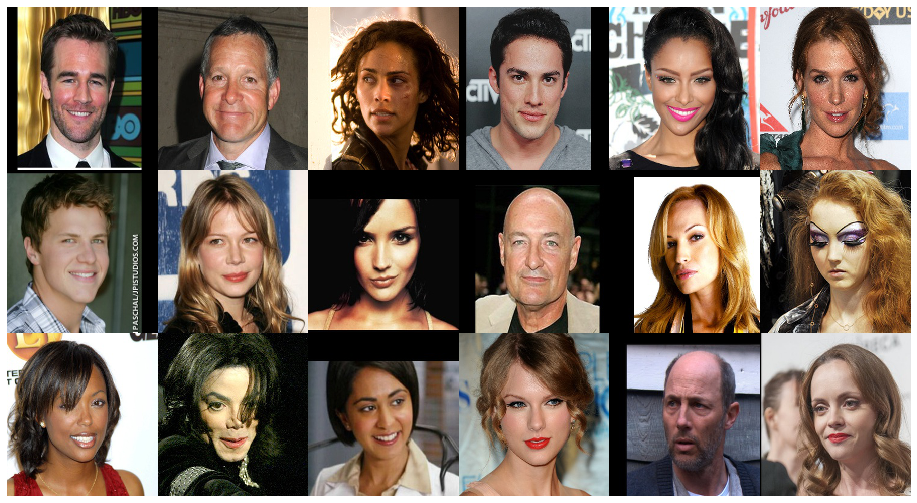

In [14]:
display_image_grid(samples, n_rows=3, n_cols=6)